# Session 1 - Introduction to Tensorflow
<p class="lead">
Assignment: Creating a Dataset/Computing with Tensorflow
</p>

<p class="lead">
Parag K. Mital<br />
<a href="https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow/info">Creative Applications of Deep Learning w/ Tensorflow</a><br />
<a href="https://www.kadenze.com/partners/kadenze-academy">Kadenze Academy</a><br />
<a href="https://twitter.com/hashtag/CADL">#CADL</a>
</p>

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Learning Goals

* Learn how to normalize a dataset by calculating the mean/std. deviation
* Learn how to use convolution
* Explore what representations exist in your dataset

# Outline

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Assignment Synopsis](#assignment-synopsis)
- [Part One - Create a Small Dataset](#part-one---create-a-small-dataset)
  - [Instructions](#instructions)
  - [Code](#code)
- [Part Two - Compute the Mean](#part-two---compute-the-mean)
  - [Instructions](#instructions-1)
  - [Code](#code-1)
- [Part Three - Compute the Standard Deviation](#part-three---compute-the-standard-deviation)
  - [Instructions](#instructions-2)
  - [Code](#code-2)
- [Part Four - Normalize the Dataset](#part-four---normalize-the-dataset)
  - [Instructions](#instructions-3)
  - [Code](#code-3)
- [Part Five - Convolve the Dataset](#part-five---convolve-the-dataset)
  - [Instructions](#instructions-4)
  - [Code](#code-4)
- [Part Six - Sort the Dataset](#part-six---sort-the-dataset)
  - [Instructions](#instructions-5)
  - [Code](#code-5)
- [Assignment Submission](#assignment-submission)

<!-- /MarkdownTOC -->

<h1>Notebook</h1>

Everything you will need to do will be inside of this notebook, and I've marked which cells you will need to edit by saying <b><font color='red'>"TODO! COMPLETE THIS SECTION!"</font></b>.  For you to work with this notebook, you'll either download the zip file from the resources section on Kadenze or clone the github repo (whichever you are more comfortable with), and then run notebook inside the same directory as wherever this file is located using the command line "jupyter notebook" or "ipython notebook" (using Terminal on Unix/Linux/OSX, or Command Line/Shell/Powershell on Windows).  If you are unfamiliar with jupyter notebook, please look at [Installation Preliminaries](https://github.com/pkmital/CADL/blob/master/README.md#installation-preliminaries) and [Session 0](https://github.com/pkmital/CADL/blob/master/session-0/session-0.ipynb) before starting!

Once you have launched notebook, this will launch a web browser with the contents of the zip files listed.  Click the file "session-1.ipynb" and this document will open in an interactive notebook, allowing you to "run" the cells, computing them using python, and edit the text inside the cells.

<a name="assignment-synopsis"></a>
# Assignment Synopsis

This first homework assignment will guide you through working with a small dataset of images.  For Part 1, you'll need to find 100 images and use the function I've provided to create a montage of your images, saving it to the file "dataset.png" (template code provided below).  You can load an existing dataset of images, find your own images, or perhaps create your own images using a creative process such as painting, photography, or something along those lines.  Each image will be reshaped to 100 x 100 pixels.  There needs to be at least 100 images.  For Parts 2 and 3, you'll then calculate the mean and deviation of it using a tensorflow session. In Part 4,  you'll normalize your dataset using the mean and deviation.  Then in Part 5, you will convolve your normalized dataset.  For Part 6, you'll need to sort the entire convolved dataset.  Finally, the last part will package everything for you in a zip file which you can upload to Kadenze to get assessed (only if you are a Kadenze Premium member, $10 p/m, free for the first month).  Remember to complete the additional excercises online, including the Gallery participation and the Forum post.  If you have any questions, be sure to enroll in the course and ask your peers in the \#CADL community or me on the forums!

https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow/info

The following assignment breakdown gives more detailed instructions and includes template code for you to fill out.  Good luck!

<a name="part-one---create-a-small-dataset"></a>
# Part One - Create a Small Dataset

<a name="instructions"></a>
## Instructions

Use Python, Numpy, and Matplotlib to load a dataset of 100 images and create a montage of the dataset as a 10 x 10 image using the function below. You'll need to make sure you call the function using a 4-d array of `N x H x W x C` dimensions, meaning every image will need to be the same size! You can load an existing dataset of images, find your own images, or perhaps create your own images using a creative process such as painting, photography, or something along those lines.

When you are creating your dataset, I want you to think about what representations might exist in the limited amount of data that you are organizing.  It is only 100 images after all, not a whole lot for a computer to reason about and learn something meaningful.  So <b>think about creating a *dataset* of images that could possibly reveal something fundamental about what is contained in the images</b>.  Try to think about creating a set of images that represents something.  For instance, this might be images of yourself over time.  Or it might be every picture you've ever taken of your cat.  Or perhaps the view from your room at different times of the day.  Consider making the changes within each image as significant as possible.  As "representative" of the thing you want to capture as possible.  Hopefully by the end of this lesson, you'll understand a little better the difference between what a computer thinks is significant and what you yourself thought was significant.

The code below will show you how to resize and/or crop your images so that they are 100 pixels x 100 pixels in height and width.  Once you have 100 images loaded, we'll use a `montage` function to draw and save your dataset to the file <b>dataset.png</b>.

<a name="code"></a>
## Code

This next section will just make sure you have the right version of python and the libraries that we'll be using.  Don't change the code here but make sure you "run" it (use "shift+enter")!

In [1]:
# First check the Python version
import sys
if sys.version_info < (3,4):
    print('You are running an older version of Python!\n\n' \
          'You should consider updating to Python 3.4.0 or ' \
          'higher as the libraries built for this course ' \
          'have only been tested in Python 3.4 and higher.\n')
    print('Try installing the Python 3.5 version of anaconda '
          'and then restart `jupyter notebook`:\n' \
          'https://www.continuum.io/downloads\n\n')

# Now get necessary libraries
try:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
except ImportError:
    print('You are missing some packages! ' \
          'We will try installing them before continuing!')
    !pip install "numpy>=1.11.0" "matplotlib>=1.5.1" "scikit-image>=0.11.3" "scikit-learn>=0.17"
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    print('Done!')

# Import Tensorflow
try:
    import tensorflow as tf
except ImportError:
    print("You do not have tensorflow installed!")
    print("Follow the instructions on the following link")
    print("to install tensorflow before continuing:")
    print("")
    print("https://github.com/pkmital/CADL#installation-preliminaries")

# This cell includes the provided libraries from the zip file
try:
    from libs import utils
except ImportError:
    print("Make sure you have started notebook in the same directory" +
          " as the provided zip file which includes the 'libs' folder" +
          " and the file 'utils.py' inside of it.  You will NOT be able"
          " to complete this assignment unless you restart jupyter"
          " notebook inside the directory created by extracting"
          " the zip file or cloning the github repo.")

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Bit of formatting because inline code is not styled very good by default:
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")

Places your images in a folder such as `dirname = '/Users/Someone/Desktop/ImagesFromTheInternet'`.  We'll then use the `os` package to load them and crop/resize them to a standard size of 100 x 100 pixels.

<h3><font color='red'>TODO! COMPLETE THIS SECTION!</font></h3>

In [3]:
# You need to find 100 images from the web/create them yourself
# or find a dataset that interests you (e.g. I used celeb faces
# in the course lecture...)
# then store them all in a single directory.
# With all the images in a single directory, you can then
# perform the following steps to create a 4-d array of:
# N x H x W x C dimensions as 100 x 100 x 100 x 3.

dirname = './img_align_celeba/'

# Load every image file in the provided directory
filenames = [os.path.join(dirname, fname)
             for fname in os.listdir(dirname)]

# Make sure we have exactly 100 image files!
filenames = filenames[:100]
assert(len(filenames) == 100)

In [6]:
# Read every filename as an RGB image
imgs = [plt.imread(fname)[..., :3] for fname in filenames]

# Crop every image to a square
imgs = [utils.imcrop_tosquare(img_i) for img_i in imgs]

# Then resize the square image to 100 x 100 pixels
imgs = [resize(img_i, (100, 100)) for img_i in imgs]

# Finally make our list of 3-D images a 4-D array with the first dimension the number of images:
imgs = np.array(imgs).astype(np.float32)

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: U

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: U

In [8]:
imgs[0].shape

(100, 100, 3)

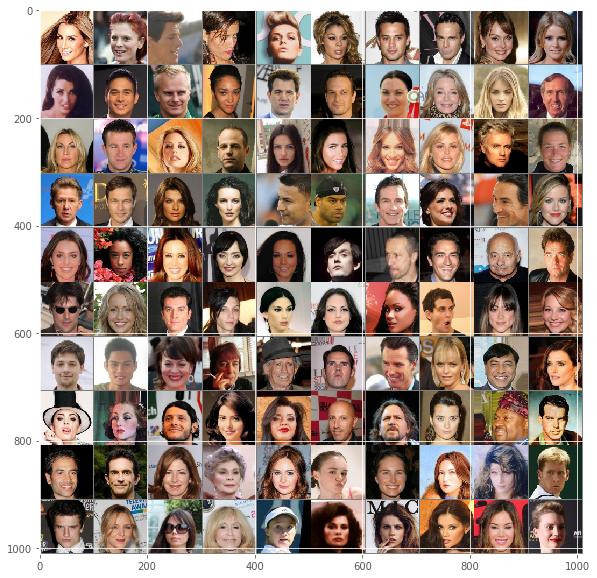

In [9]:
# Plot the resulting dataset:
# Make sure you "run" this cell after you create your `imgs` variable as a 4-D array!
# Make sure we have a 100 x 100 x 100 x 3 dimension array
assert(imgs.shape == (100, 100, 100, 3))
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(imgs, saveto='dataset.png'))

<a name="part-two---compute-the-mean"></a>
# Part Two - Compute the Mean

<a name="instructions-1"></a>
## Instructions

First use Tensorflow to define a session.  Then use Tensorflow to create an operation which takes your 4-d array and calculates the mean color image (100 x 100 x 3) using the function `tf.reduce_mean`.  Have a look at the documentation for this function to see how it works in order to get the mean of every pixel and get an image of (100 x 100 x 3) as a result.  You'll then calculate the mean image by running the operation you create with your session (e.g. <code>sess.run(...)</code>).  Finally, plot the mean image, save it, and then include this image in your zip file as <b>mean.png</b>.

<a name="code-1"></a>
## Code

<h3><font color='red'>TODO! COMPLETE THIS SECTION!</font></h3>

In [15]:
# First create a tensorflow session
sess = tf.Session()
# Now create an operation that will calculate the mean of your images
mean_img_op = tf.reduce_mean(imgs, 0)

In [16]:
# And then run that operation using your session
mean_img = sess.run(mean_img_op)

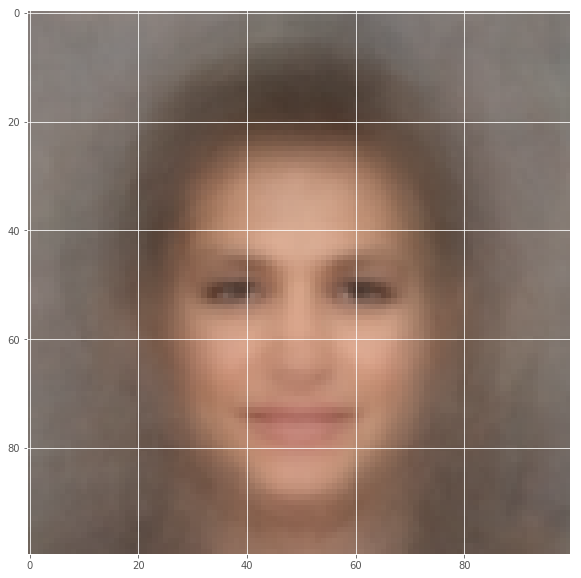

In [17]:
# Then plot the resulting mean image:
# Make sure the mean image is the right size!
assert(mean_img.shape == (100, 100, 3))
plt.figure(figsize=(10, 10))
plt.imshow(mean_img)
plt.imsave(arr=mean_img, fname='mean.png')

Once you have seen the mean image of your dataset, how does it relate to your own expectations of the dataset?  Did you expect something different?  Was there something more "regular" or "predictable" about your dataset that the mean image did or did not reveal?  If your mean image looks a lot like something recognizable, it's a good sign that there is a lot of predictability in your dataset.  If your mean image looks like nothing at all, a gray blob where not much seems to stand out, then it's pretty likely that there isn't very much in common between your images.  Neither is a bad scenario.  Though, it is more likely that having some predictability in your mean image, e.g. something recognizable, that there are representations worth exploring with deeper networks capable of representing them.  However, we're only using 100 images so it's a *very* small dataset to begin with.

<a name="part-three---compute-the-standard-deviation"></a>
# Part Three - Compute the Standard Deviation

<a name="instructions-2"></a>
## Instructions

Now use tensorflow to calculate the standard deviation and upload the standard deviation image averaged across color channels as a "jet" heatmap of the 100 images.  This will be a little more involved as there is no operation in tensorflow to do this for you.  However, you can do this by calculating the mean image of your dataset as a 4-D array.  To do this, you could write e.g.  `mean_img_4d = tf.reduce_mean(imgs, axis=0, keep_dims=True)` to give you a `1 x H x W x C` dimension array calculated on the `N x H x W x C` images variable.  The axis parameter is saying to calculate the mean over the 0th dimension, meaning for every possible `H`, `W`, `C`, or for every pixel, you will have a mean composed over the `N` possible values it could have had, or what that pixel was for every possible image.  This way, you can write `images - mean_img_4d` to give you a `N x H x W x C` dimension variable, with every image in your images array having been subtracted by the `mean_img_4d`.  If you calculate the square root of the expected squared differences of this resulting operation, you have your standard deviation!

In summary, you'll need to write something like: `subtraction = imgs - tf.reduce_mean(imgs, axis=0, keep_dims=True)`, then reduce this operation using `tf.sqrt(tf.reduce_mean(subtraction * subtraction, axis=0))` to get your standard deviation then include this image in your zip file as <b>std.png</b>

<a name="code-2"></a>
## Code

<h3><font color='red'>TODO! COMPLETE THIS SECTION!</font></h3>

In [23]:
imgs.shape

(100, 100, 100, 3)

In [61]:
# Create a tensorflow operation to give you the standard deviation

# First compute the difference of every image with a
# 4 dimensional mean image shaped 1 x H x W x C
mean_img_4d = tf.reduce_mean(tf.reshape(imgs, [100, imgs.shape[1], imgs.shape[2], 3]), axis=0, keep_dims=True)
print(mean_img_4d)

Tensor("Mean_28:0", shape=(1, 100, 100, 3), dtype=float32)


In [64]:
subtraction = imgs - mean_img_4d

# Now compute the standard deviation by calculating the
# square root of the expected squared differences
std_img_op = tf.sqrt(tf.reduce_mean(subtraction * subtraction, axis=0))

# Now calculate the standard deviation using your session
std_img = sess.run(std_img_op)

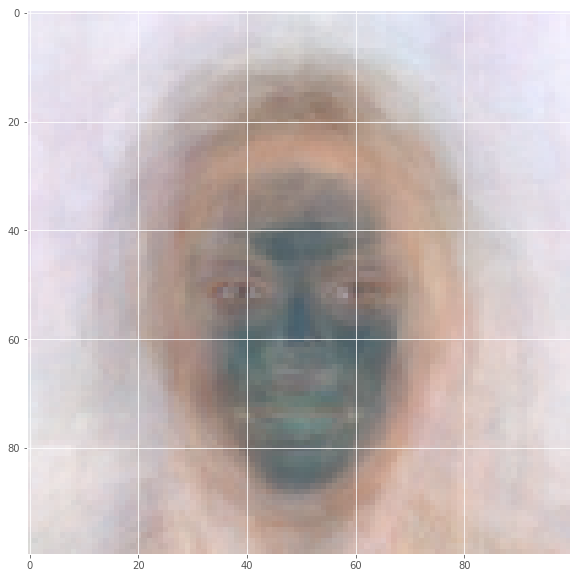

In [65]:
# Then plot the resulting standard deviation image:
# Make sure the std image is the right size!
assert(std_img.shape == (100, 100) or std_img.shape == (100, 100, 3))
plt.figure(figsize=(10, 10))
std_img_show = std_img / np.max(std_img)
plt.imshow(std_img_show)
plt.imsave(arr=std_img_show, fname='std.png')

Once you have plotted your dataset's standard deviation per pixel, what does it reveal about your dataset?  Like with the mean image, you should consider what is predictable and not predictable about this image.

<a name="part-four---normalize-the-dataset"></a>
# Part Four - Normalize the Dataset

<a name="instructions-3"></a>
## Instructions
Using tensorflow, we'll attempt to normalize your dataset using the mean and standard deviation. 

<a name="code-3"></a>
## Code

<h3><font color='red'>TODO! COMPLETE THIS SECTION!</font></h3>

In [82]:
print(imgs.shape)
mean_img_4d = tf.reduce_mean(imgs, axis=0, keep_dims=True)
print(mean_img_4d)
subtraction = imgs - mean_img_4d
print(subtraction)
std_img_op = tf.sqrt(tf.reduce_mean(subtraction * subtraction, axis=0, keep_dims=True))
print(std_img_op)

norm_imgs_op = (imgs- mean_img_4d)/std_img_op
print(norm_imgs_op)

(100, 100, 100, 3)
Tensor("Mean_58:0", shape=(1, 100, 100, 3), dtype=float32)
Tensor("sub_39:0", shape=(100, 100, 100, 3), dtype=float32)
Tensor("Sqrt_20:0", shape=(1, 100, 100, 3), dtype=float32)
Tensor("truediv_18:0", shape=(100, 100, 100, 3), dtype=float32)


In [83]:
norm_imgs = sess.run(norm_imgs_op)
print(np.min(norm_imgs), np.max(norm_imgs))
print(imgs.dtype)
print(norm_imgs.shape)

-5.60687 4.96678
float32
(100, 100, 100, 3)


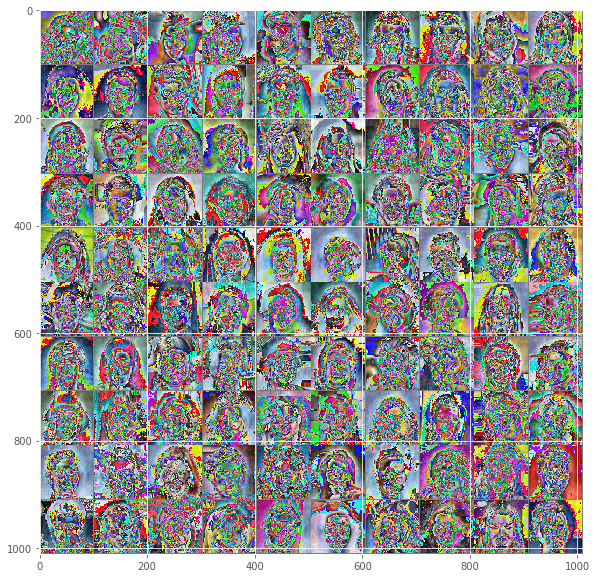

In [84]:
# Then plot the resulting normalized dataset montage:
# Make sure we have a 100 x 100 x 100 x 3 dimension array
assert(norm_imgs.shape == (100, 100, 100, 3))
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(norm_imgs, 'normalized.png'))

We apply another type of normalization to 0-1 just for the purposes of plotting the image.  If we didn't do this, the range of our values would be somewhere between -1 and 1, and matplotlib would not be able to interpret the entire range of values.  By rescaling our -1 to 1 valued images to 0-1, we can visualize it better.

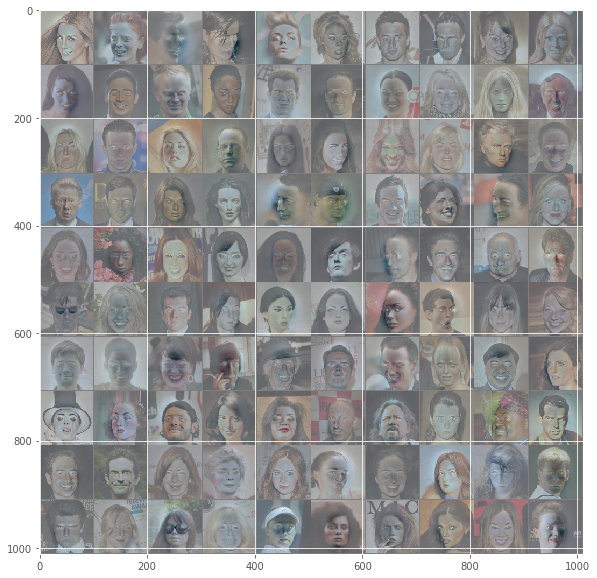

In [85]:
norm_imgs_show = (norm_imgs - np.min(norm_imgs)) / (np.max(norm_imgs) - np.min(norm_imgs))
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(norm_imgs_show, 'normalized.png'))

<a name="part-five---convolve-the-dataset"></a>
# Part Five - Convolve the Dataset

<a name="instructions-4"></a>
## Instructions
Using tensorflow, we'll attempt to convolve your dataset with one of the kernels we created during the lesson, and then in the next part, we'll take the sum of the convolved output to use for sorting.  You should use the function `utils.gabor` to create an edge detector.  You can also explore with the `utils.gauss2d` kernel.  What you must figure out is how to reshape your kernel to be 4-dimensional: K_H, K_W, C_I, and C_O, corresponding to the kernel's height and width (e.g. 16), the number of input channels (RGB = 3 input channels), and the number of output channels, (1).

<a name="code-4"></a>
## Code

<h3><font color='red'>TODO! COMPLETE THIS SECTION!</font></h3>

In [ ]:
# First build 3 kernels for each input color channel
ksize = ...
kernel = np.concatenate([utils.gabor(ksize)[:, :, np.newaxis] for i in range(3)], axis=2)
                       
# Now make the kernels into the shape: [ksize, ksize, 3, 1]:
kernel_4d = ...
assert(kernel_4d.shape == (ksize, ksize, 3, 1))

We'll Perform the convolution with the 4d tensor in `kernel_4d`.  This is a `ksize` x `ksize` x 3 x 1 tensor, where each input color channel corresponds to one filter with 1 output.  Each filter looks like:

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(kernel_4d[:, :, 0, 0], cmap='gray')
plt.imsave(arr=kernel_4d[:, :, 0, 0], fname='kernel.png', cmap='gray')

Perform the convolution with the 4d tensors:

<h3><font color='red'>TODO! COMPLETE THIS SECTION!</font></h3>

In [ ]:
convolved = utils.convolve(...

In [ ]:
convolved_show = (convolved - np.min(convolved)) / (np.max(convolved) - np.min(convolved))
print(convolved_show.shape)
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(convolved_show[..., 0], 'convolved.png'), cmap='gray')

What we've just done is build a "hand-crafted" feature detector: the Gabor Kernel.  This kernel is built to respond to particular orientation: horizontal edges, and a particular scale.  It also responds equally to R, G, and B color channels, as that is how we have told the convolve operation to work: use the same kernel for every input color channel.  When we work with deep networks, we'll see how we can *learn* the convolution kernels for every color channel, and learn many more of them, in the order of 100s per color channel.  That is really where the power of deep networks will start to become obvious.  For now, we've seen just how difficult it is to get at any higher order features of the dataset.  We've really only picked out some edges!

<a name="part-six---sort-the-dataset"></a>
# Part Six - Sort the Dataset

<a name="instructions-5"></a>
## Instructions
Using tensorflow, we'll attempt to organize your dataset. We'll try sorting based on the mean value of each convolved image's output to use for sorting.  To do this, we could calculate either the sum value (`tf.reduce_sum`) or the mean value (`tf.reduce_mean`) of each image in your dataset and then use those values, e.g. stored inside a variable `values` to sort your images using something like `tf.nn.top_k` and `sorted_imgs = np.array([imgs[idx_i] for idx_i in idxs])` prior to creating the montage image, `m = montage(sorted_imgs, "sorted.png")` and then include this image in your zip file as <b>sorted.png</b>

<a name="code-5"></a>
## Code

<h3><font color='red'>TODO! COMPLETE THIS SECTION!</font></h3>

In [ ]:
# Create a set of operations using tensorflow which could
# provide you for instance the sum or mean value of every
# image in your dataset:

# First flatten our convolved images so instead of many 3d images,
# we have many 1d vectors.
# This should convert our 4d representation of N x H x W x C to a
# 2d representation of N x (H*W*C)
flattened = tf.reshape(convolved...
assert(flattened.get_shape().as_list() == [100, 10000])

In [ ]:
# Now calculate some statistics about each of our images
values = tf.reduce_sum(flattened, axis=1)

# Then create another operation which sorts those values
# and then calculate the result:
idxs_op = tf.nn.top_k(values, k=100)[1]
idxs = sess.run(idxs_op)

# Then finally use the sorted indices to sort your images:
sorted_imgs = np.array([imgs[idx_i] for idx_i in idxs])

In [ ]:
# Then plot the resulting sorted dataset montage:
# Make sure we have a 100 x 100 x 100 x 3 dimension array
assert(sorted_imgs.shape == (100, 100, 100, 3))
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(sorted_imgs, 'sorted.png'))

What does your sorting reveal?  Could you imagine the same sorting over many more images reveal the thing your dataset sought to represent?  It is likely that the representations that you wanted to find hidden within "higher layers", i.e., "deeper features" of the image, and that these "low level" features, edges essentially, are not very good at describing the really interesting aspects of your dataset.  In later sessions, we'll see how we can combine the outputs of many more convolution kernels that have been assembled in a way that accentuate something very particular about each image, and build a sorting that is much more intelligent than this one!

<a name="assignment-submission"></a>
# Assignment Submission

Now that you've completed all 6 parts, we'll create a zip file of the current directory using the code below.  This code will make sure you have included this completed ipython notebook and the following files named exactly as:

<pre>
    session-1/
      session-1.ipynb
      dataset.png
      mean.png
      std.png
      normalized.png
      kernel.png
      convolved.png
      sorted.png
      libs/
        utils.py
</pre>

You'll then submit this zip file for your first assignment on Kadenze for "Assignment 1: Datasets/Computing with Tensorflow"!  If you have any questions, remember to reach out on the forums and connect with your peers or with me.

<b>To get assessed, you'll need to be a premium student.</b>  If you aren't already enrolled as a student, register now at http://www.kadenze.com/ and join the #CADL community to see what your peers are doing! https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow/info

Then remember to complete the remaining parts of Assignemnt 1 on Kadenze!:
* Comment on 1 student's open-ended arrangement (Part 6) in the course gallery titled "Creating a Dataset/ Computing with Tensorflow". Think about what images they've used in their dataset and how the arrangement reflects what could be represented by that data.
* Finally make a forum post in the forum for this assignment "Creating a Dataset/ Computing with Tensorflow".
    - Including a link to an artist making use of machine learning to organize data or finding representations within large datasets
    - Tell a little about their work (min 20 words).
    - Comment on at least 2 other student's forum posts (min 20 words)

Make sure your notebook is named "session-1" or else replace it with the correct name in the list of files below:

In [ ]:
utils.build_submission('session-1.zip',
                       ('dataset.png',
                        'mean.png',
                        'std.png',
                        'normalized.png',
                        'kernel.png',
                        'convolved.png',
                        'sorted.png',
                        'session-1.ipynb'))